# Loading the Dataset

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
%matplotlib inline


In [138]:
df = pd.read_csv("Automobile_data.csv")

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [140]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Data Preprocessing


In [141]:
missing_values = df.isin(['?'])

print('Number of missing values per column:')
for col in missing_values.columns:
    if missing_values[col].sum() > 0:
        print(col, missing_values[col].sum())


Number of missing values per column:
normalized-losses 41
num-of-doors 2
bore 4
stroke 4
horsepower 2
peak-rpm 2
price 4


In [142]:
SI_mean = SimpleImputer(strategy = 'mean',missing_values='?')
SI_mode = SimpleImputer(strategy = 'most_frequent')

In [143]:
columns_to_be_filled = ['normalized-losses',
'bore',
'stroke',
'horsepower',
'peak-rpm',
'price']

for i in columns_to_be_filled:
  df[i] = df[i].replace('?', np.nan)
for i in columns_to_be_filled:  
  df[i] = df[i].fillna(df[i].astype(float).mean())

In [144]:
df = df[df['num-of-doors'] != '?']
df.reset_index(drop=True, inplace=True)
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [145]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [146]:
cat_cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
            'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders','fuel-system']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
print(df.head())

   symboling normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0          3             122.0     0          1           0             1   
1          3             122.0     0          1           0             1   
2          1             122.0     0          1           0             1   
3          2               164     1          1           0             0   
4          2               164     1          1           0             0   

   body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0           0             2                0        88.6  ...          130   
1           0             2                0        88.6  ...          130   
2           2             2                0        94.5  ...          152   
3           3             1                0        99.8  ...          109   
4           3             0                0        99.4  ...          136   

   fuel-system  bore  stroke  compression-ratio  horsepower  peak-rp

In [147]:
num_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
            'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
            'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print(df.head())

   symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0          3           0.004040     0          1           0             1   
1          3           0.004040     0          1           0             1   
2          1           0.004040     0          1           0             1   
3          2           1.328701     1          1           0             0   
4          2           1.328701     1          1           0             0   

   body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0           0             2                0   -1.689532  ...     0.070180   
1           0             2                0   -1.689532  ...     0.070180   
2           2             2                0   -0.710457  ...     0.597834   
3           3             1                0    0.169051  ...    -0.433489   
4           3             0                0    0.102673  ...     0.214086   

   fuel-system      bore    stroke  compression-ratio  horsepo

In [148]:
corr_matrix = df.corr()
print("Correlation Matrix:\n", corr_matrix)
desc_stats = df.describe()
print("\nDescriptive Statistics:\n", desc_stats)

Correlation Matrix:
                    symboling  normalized-losses      make  fuel-type  \
symboling           1.000000           0.465972 -0.120945   0.188685   
normalized-losses   0.465972           1.000000 -0.247411   0.102719   
make               -0.120945          -0.247411  1.000000  -0.124704   
fuel-type           0.188685           0.102719 -0.124704   1.000000   
aspiration         -0.063586          -0.015615  0.067567  -0.426434   
num-of-doors        0.664550           0.362716 -0.161528   0.181675   
body-style         -0.596221          -0.253388  0.094477  -0.145355   
drive-wheels       -0.043356           0.314478 -0.010132  -0.143700   
engine-location     0.212407           0.000495  0.053711   0.039356   
wheel-base         -0.532929          -0.053305  0.073633  -0.314774   
length             -0.357856           0.024851  0.112977  -0.211944   
width              -0.232241           0.088535 -0.001650  -0.234257   
height             -0.541323          -0.36

# Univariate Analysis

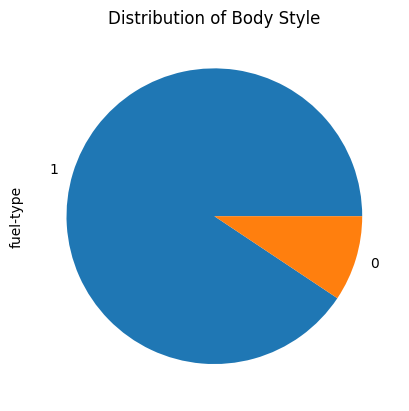

In [149]:
df['fuel-type'].value_counts().plot(kind='pie')

plt.title('Distribution of Body Style')
plt.show()


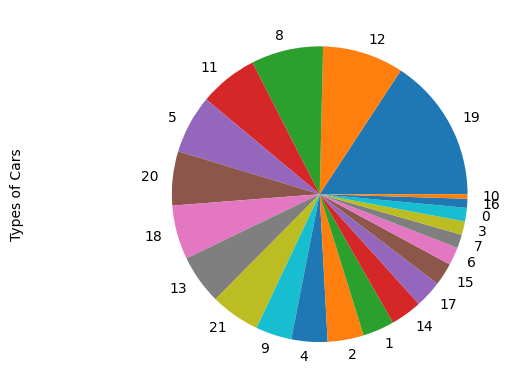

In [150]:
df['make'].value_counts().plot(kind='pie')
ax = plt.gca()

ax.set_ylabel('Types of Cars', rotation=90, labelpad=40)
ax.yaxis.set_label_coords(-0.3, 0.5)

# show the plot
plt.show()

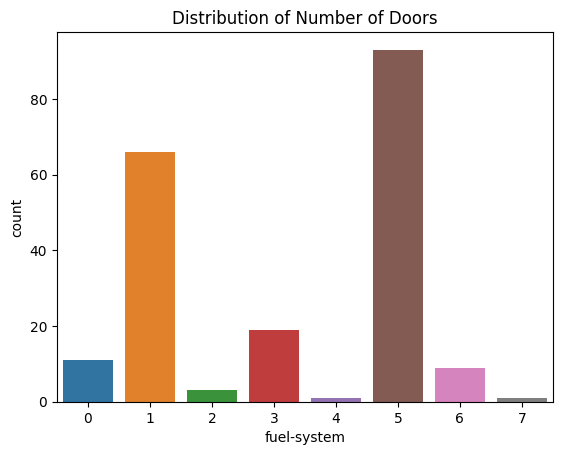

In [151]:
sns.countplot(x='fuel-system', data=df)
plt.title('Distribution of Number of Doors')
plt.show()


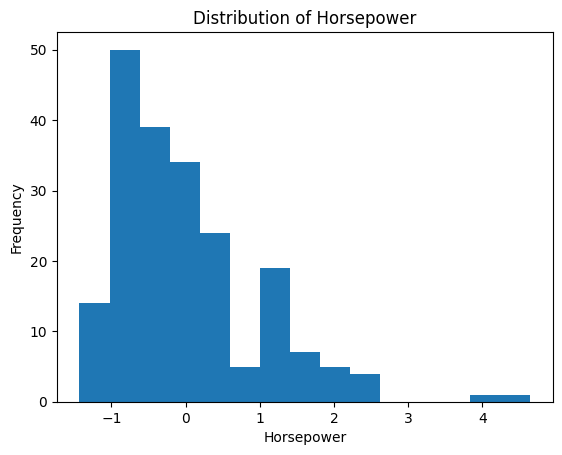

In [152]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
plt.hist(df['horsepower'], bins=15)
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')


plt.show()


# Bivariate Analysis

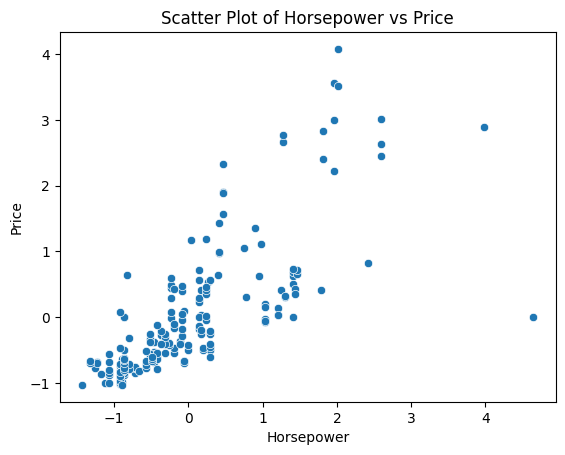

In [153]:
df['horsepower'] = df['horsepower'].astype(float)
df['price'] = df['price'].astype(float)

sns.scatterplot(x='horsepower', y='price', data=df)

plt.title('Scatter Plot of Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()


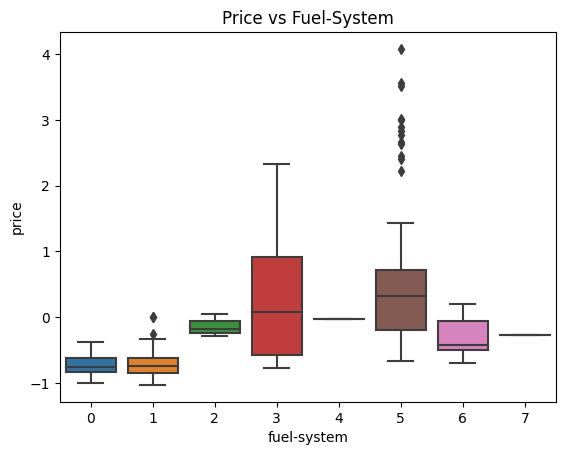

In [154]:
sns.boxplot(x="fuel-system", y="price", data=df)
plt.title('Price vs Fuel-System')
plt.show()


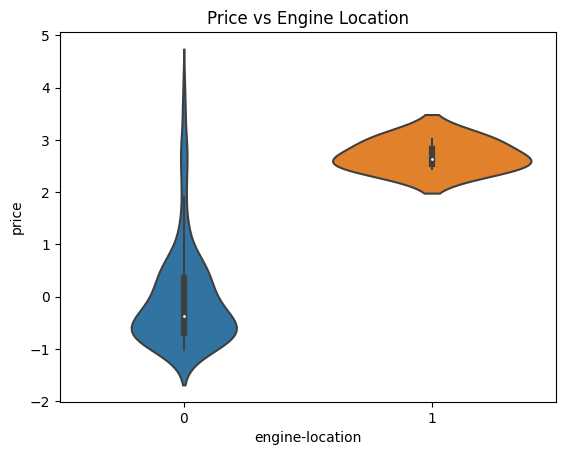

In [155]:
sns.violinplot(x="engine-location", y="price", data=df)
plt.title('Price vs Engine Location')
plt.show()


# Multivariate Analysis

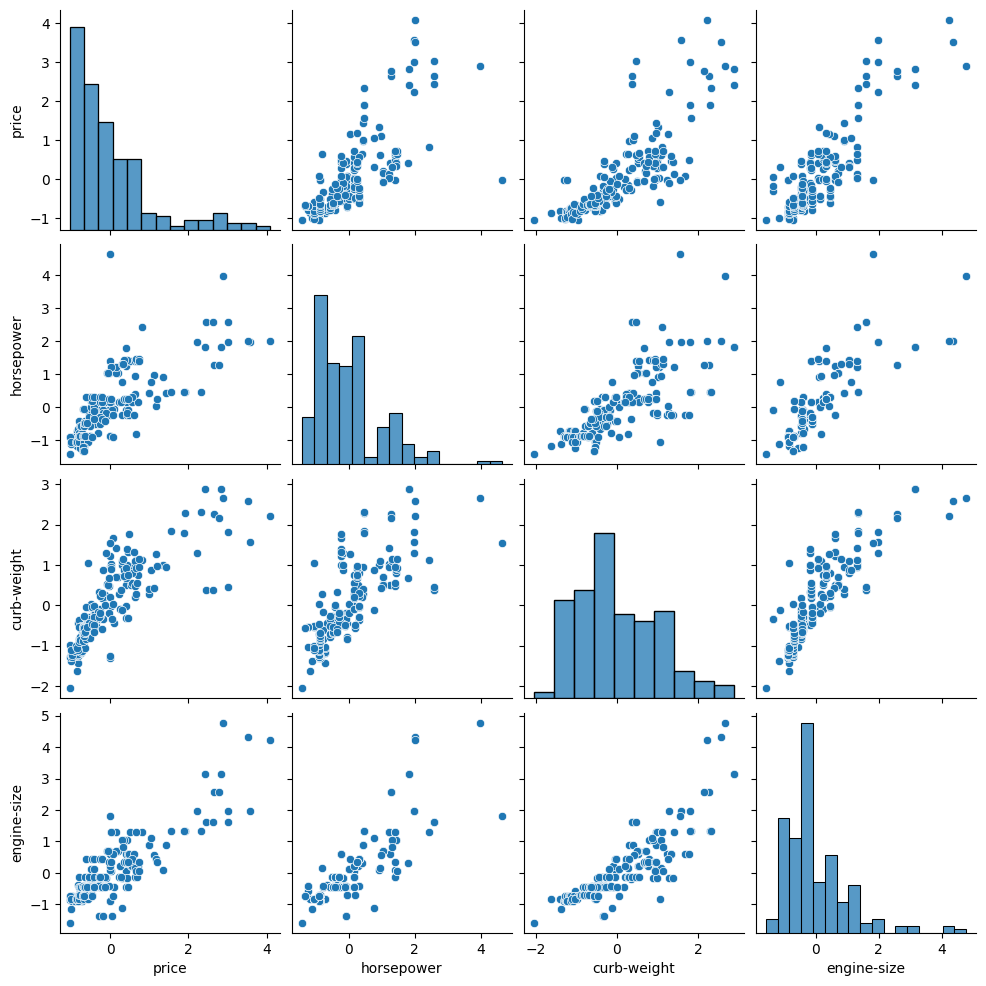

In [156]:
sns.pairplot(df[['price', 'horsepower', 'curb-weight', 'engine-size']])
plt.show()


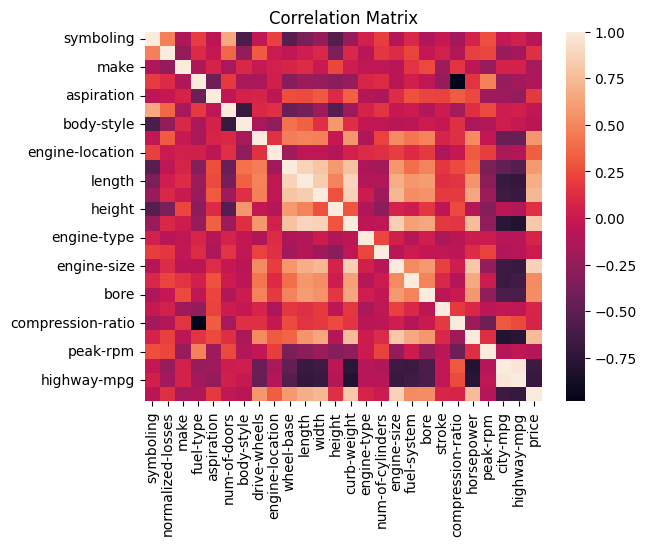

In [157]:
sns.heatmap(df.corr())
plt.title('Correlation Matrix')
plt.show()


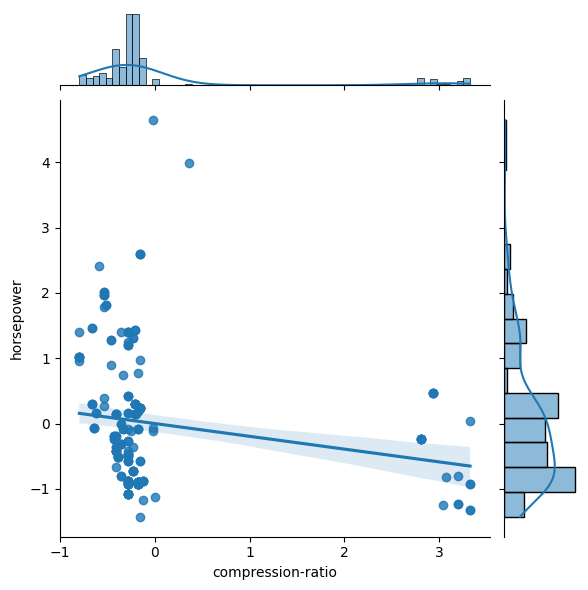

In [158]:
sns.jointplot(x='compression-ratio', y='horsepower', data=df, kind='reg')
plt.show()


# Machine Learning Model


In [159]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.5774399176474927
